Index(['Movie', 'LeadStudio', 'RottenTomatoes', 'AudienceScore', 'Story',
       'Genre', 'TheatersOpenWeek', 'OpeningWeekend', 'BOAvgOpenWeekend',
       'DomesticGross', 'ForeignGross', 'WorldGross', 'Budget',
       'Profitability', 'OpenProfit', 'Year'],
      dtype='object')


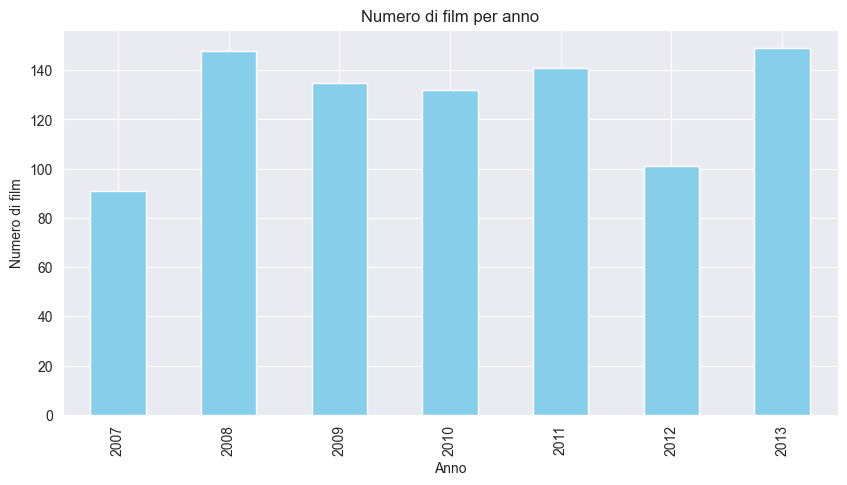

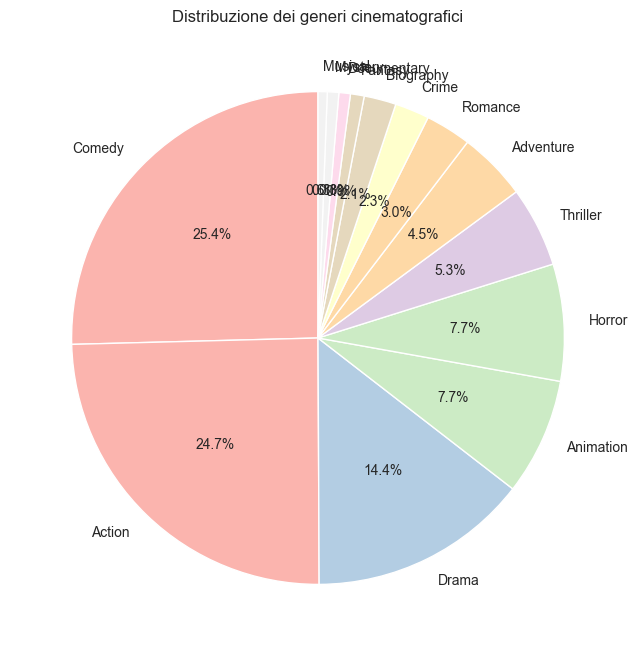

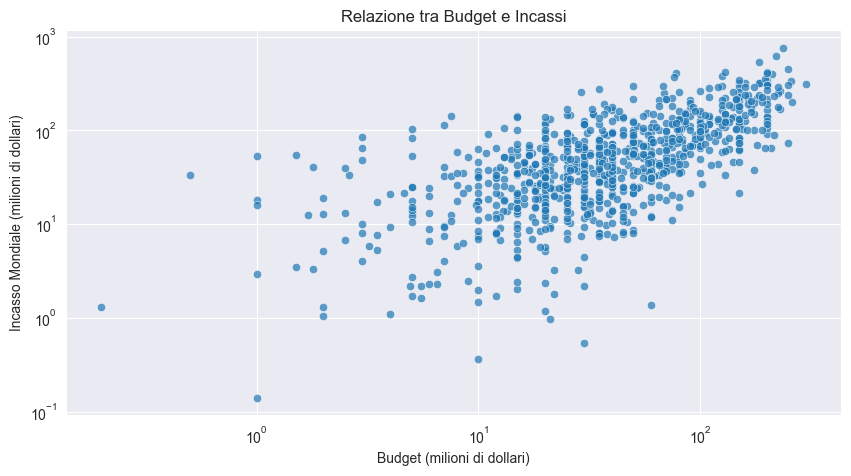

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/marti/Downloads/HollywoodMovies.csv")

df.columns = df.columns.str.strip()

print(df.columns)

# Controllo e correzione del nome della colonna "WorldwideGross"
if "WorldwideGross" not in df.columns:
    for col in df.columns:
        if "Gross" in col:
            df.rename(columns={col: "WorldwideGross"}, inplace=True)
            break

# Rimozione di eventuali valori NaN nelle colonne chiave
df = df.dropna(subset=["WorldwideGross", "Budget"])

# Conversione delle colonne numeriche se necessario
if df["WorldwideGross"].dtype == "O":
    df["WorldwideGross"] = df["WorldwideGross"].replace(r"[\$,]", "", regex=True).astype(float)
if df["Budget"].dtype == "O":
    df["Budget"] = df["Budget"].replace(r"[\$,]", "", regex=True).astype(float)

df.head()

# Markdown - Analisi dei Dati
"""
# Analisi dei Dati - Hollywood Movies

## Numero di Film per Anno
Il seguente grafico mostra il numero di film usciti ogni anno.
"""
# Analisi 1: Numero di film per anno
plt.figure(figsize=(10,5))
df["Year"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Numero di film per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di film")
plt.show()

"""
## Distribuzione dei Generi Cinematografici
Il grafico a torta rappresenta la distribuzione dei film per genere.
"""
# Analisi 2: Distribuzione dei generi
plt.figure(figsize=(8,8))
df["Genre"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Pastel1")
plt.title("Distribuzione dei generi cinematografici")
plt.ylabel("")
plt.show()

"""
## Relazione tra Budget e Incassi
Il grafico di dispersione mostra la relazione tra il budget e l'incasso mondiale.
"""
# Analisi 3: Relazione tra Budget e Incassi
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Budget", y="WorldwideGross", alpha=0.7)
plt.title("Relazione tra Budget e Incassi")
plt.xlabel("Budget (milioni di dollari)")
plt.ylabel("Incasso Mondiale (milioni di dollari)")
plt.xscale("log")
plt.yscale("log")
plt.show()


